In [2]:


import pandas as pd
import os
import numpy as np

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/John-Blodgett/CSC466-Project/main/total_data.csv')
df = df.drop('file dist of bytes', axis=1)
df['hash dist'] = df['hash dist'].apply(eval)
df_dist = pd.DataFrame(df['hash dist'].to_list(), 
                       index=df.index, 
                       columns=['0','1','2','3','4','5','6','7','8','9','a','b','c','d','e','f'])
df_dist['hash type'] = df['hash type']

df.append(df_dist)
df = df.drop('hash dist', axis=1)
df = df.drop('hash', axis=1)
df
df = pd.get_dummies(df, columns=['file type', 'consecutiveByte'])



In [ ]:
df


,consecutiveCount,hash type,hash len,hash 0 bits,hash 1 bits,hash len bits,file size (bytes),file type_.jpg,file type_.json,file type_.pdf,file type_.txt,"consecutiveByte_b""'""",consecutiveByte_b' ',consecutiveByte_b'!',"consecutiveByte_b'""'",consecutiveByte_b'(',consecutiveByte_b'-',consecutiveByte_b'.',consecutiveByte_b'0',consecutiveByte_b'1',consecutiveByte_b'2',consecutiveByte_b'3',consecutiveByte_b'4',consecutiveByte_b'5',consecutiveByte_b'6',consecutiveByte_b'7',consecutiveByte_b'8',consecutiveByte_b'9',consecutiveByte_b';',consecutiveByte_b'>',consecutiveByte_b'?',consecutiveByte_b'@',consecutiveByte_b'A',consecutiveByte_b'B',consecutiveByte_b'D',consecutiveByte_b'O',consecutiveByte_b'P',consecutiveByte_b'Q',consecutiveByte_b'U',consecutiveByte_b'Y',...,consecutiveByte_b'\x11',consecutiveByte_b'\x14',consecutiveByte_b'\x16',consecutiveByte_b'\x1a',consecutiveByte_b'\x1e',consecutiveByte_b'\x82',consecutiveByte_b'\x83',consecutiveByte_b'\x84',consecutiveByte_b'\x88',consecutiveByte_b'\x8a',consecutiveByte_b'\x8f',consecutiveByte_b'\x91',consecutiveByte_b'\x92',consecutiveByte_b'\x9e',consecutiveByte_b'\xa3',consecutiveByte_b'\xa4',consecutiveByte_b'\xa5',consecutiveByte_b'\xaa',consecutiveByte_b'\xb3',consecutiveByte_b'\xd1',consecutiveByte_b'\xdd',consecutiveByte_b'\xe7',consecutiveByte_b'\xee',consecutiveByte_b'\xf4',consecutiveByte_b'\xf5',consecutiveByte_b'\xff',consecutiveByte_b'_',consecutiveByte_b'a',consecutiveByte_b'b',consecutiveByte_b'c',consecutiveByte_b'd',consecutiveByte_b'e',consecutiveByte_b'f',consecutiveByte_b'h',consecutiveByte_b'i',consecutiveByte_b'o',consecutiveByte_b'p',consecutiveByte_b's',consecutiveByte_b'w',consecutiveByte_b'~'
0,50,SHA-1,40,69,91,160,14425,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,50,SHA-256,64,133,123,256,13631,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,50,SHA-3-256,64,116,140,256,16170,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,50,MD5,32,55,73,128,14762,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,50,SHA-256,64,117,139,256,14517,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5245,72,SHA-256,64,125,131,256,1039358,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5246,359,SHA-256,64,134,122,256,4789771,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5247,100,SHA-256,64,121,135,256,1311284,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5248,50,MD5,32,64,64,128,226594,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
df['hash type'] = df['hash type'].rank(method='dense', ascending=False).astype(int)
print (df)


      consecutiveCount  hash type  ...  consecutiveByte_b'w'  consecutiveByte_b'~'
0                   50          3  ...                     0                     0
1                   50          2  ...                     0                     0
2                   50          1  ...                     0                     0
3                   50          4  ...                     0                     0
4                   50          2  ...                     0                     0
...                ...        ...  ...                   ...                   ...
5245                72          2  ...                     0                     0
5246               359          2  ...                     0                     0
5247               100          2  ...                     0                     0
5248                50          4  ...                     0                     0
5249                11          3  ...                     0                     0

[52

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(df.drop('hash type', axis=1), df['hash type'], test_size=0.2, random_state=0)


In [ ]:
def get_cv_error(k):
  # define pipeline
  pipeline = make_pipeline(
      KNeighborsClassifier(n_neighbors=k)
  )
  # calculate errors from cross-validation
  cv_errs = cross_val_score(pipeline, X=X_train, 
                             y=y_train,
                             scoring='accuracy', cv=10)
  # calculate average of the cross-validation errors
  return cv_errs.mean()

get_cv_error(6)

0.38357142857142856

18    0.347381
17    0.348333
16    0.349048
19    0.351667
14    0.354524
15    0.357143
13    0.357381
12    0.357381
11    0.368333
10    0.374762
8     0.375000
9     0.376190
7     0.380476
6     0.383571
5     0.398810
4     0.412619
3     0.420238
2     0.427857
1     0.455000
dtype: float64

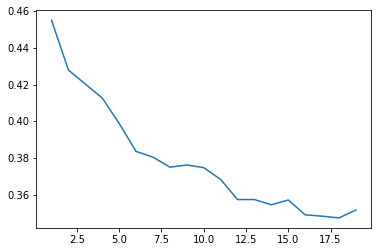

In [ ]:
ks = pd.Series(range(1, 20))
ks.index = range(1, 20)
test_errs = ks.apply(get_cv_error)

test_errs.plot.line()
test_errs.sort_values()

In [ ]:
classifier = KNeighborsClassifier(n_neighbors=1)
classifier.fit(X_train, y_train)


y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred))

In [ ]:
def get_cv_error_mlp_iterations(k):
  # define pipeline
  pipeline = make_pipeline(
      MLPClassifier(max_iter=k)
  )
  # calculate errors from cross-validation
  cv_errs = cross_val_score(pipeline, X=X_train, 
                             y=y_train,
                             scoring='f1_macro', cv=10)
  # calculate average of the cross-validation errors
  return cv_errs.mean()

In [ ]:


ks = pd.Series(range(100, 500, 100))
ks.index = range(100, 500, 100)
test_errs = ks.apply(get_cv_error_mlp_iterations)

test_errs.plot.line()
test_errs.sort_values()



In [ ]:
def get_cv_error_mlp_hidden_layers(k):
  # define pipeline
  pipeline = make_pipeline(
      MLPClassifier(hidden_layer_sizes=k, max_iter=300)
  )
  # calculate errors from cross-validation
  cv_errs = cross_val_score(pipeline, X=X_train, 
                             y=y_train,
                             scoring='f1_macro', cv=10)
  # calculate average of the cross-validation errors
  return cv_errs.mean()

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


175    0.179186
125    0.183127
100    0.184660
150    0.184906
225    0.197744
200    0.215711
dtype: float64

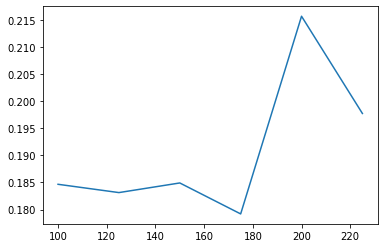

In [ ]:

ks = pd.Series(range(100, 250, 25))
ks.index = range(100, 250, 25)
test_errs = ks.apply(get_cv_error_mlp_hidden_layers)

test_errs.plot.line()
test_errs.sort_values()

In [ ]:
classifier = MLPClassifier(hidden_layer_sizes=200, max_iter=400)
classifier.fit(X_train, y_train)


y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         MD5       0.00      0.00      0.00       251
       SHA-1       0.00      0.00      0.00       269
     SHA-256       0.25      1.00      0.40       265
   SHA-3-256       0.50      0.00      0.01       265

    accuracy                           0.25      1050
   macro avg       0.19      0.25      0.10      1050
weighted avg       0.19      0.25      0.10      1050



/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


6     0.719464
5     0.722301
8     0.726522
7     0.731465
9     0.732337
11    0.734304
12    0.734738
14    0.735980
10    0.737094
16    0.740716
15    0.740933
13    0.741538
19    0.746158
17    0.747685
20    0.750578
18    0.750999
22    0.751503
21    0.753490
23    0.754641
29    0.754750
28    0.755304
27    0.755334
24    0.755651
25    0.757141
26    0.757466
dtype: float64

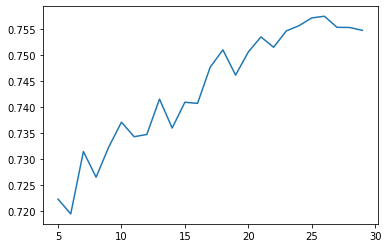

In [13]:

ks = pd.Series(range(5,30))
ks.index = range(5,30)
test_errs = ks.apply(get_cv_error_descision_tree_maxDepth)

test_errs.plot.line()
test_errs.sort_values()

In [ ]:
def get_cv_error_descision_tree_maxFeatures(k):
  # define pipeline
  pipeline = make_pipeline(
      DecisionTreeClassifier(max_features=k)
  )
  # calculate errors from cBhaluezpz123@ross-validation
  cv_errs = cross_val_score(pipeline, X=X_train, 
                             y=y_train,
                             scoring='f1_macro', cv=10)
  # calculate average of the cross-validation errors
  return cv_errs.mean()

2     0.736775
7     0.741967
10    0.742289
6     0.742351
8     0.742591
5     0.743449
4     0.746071
9     0.746591
3     0.747558
dtype: float64

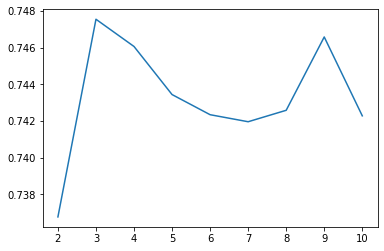

In [ ]:



ks = pd.Series(range(2,11))
ks.index = range(2,11)
test_errs = ks.apply(get_cv_error_descision_tree_maxFeatures)

test_errs.plot.line()
test_errs.sort_values()

In [14]:

classifier = DecisionTreeClassifier(max_depth=25, max_features=9)
classifier.fit(X_train, y_train)


y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.48      0.55      0.51       265
           2       0.47      0.40      0.43       265
           3       1.00      1.00      1.00       269
           4       1.00      1.00      1.00       251

    accuracy                           0.74      1050
   macro avg       0.74      0.74      0.74      1050
weighted avg       0.73      0.74      0.73      1050



In [8]:
def get_cv_error_random_forest_estimators(k):
  # define pipeline
  pipeline = make_pipeline(
      RandomForestClassifier(n_estimators=k)
  )
  # calculate errors from cBhaluezpz123@ross-validation
  cv_errs = cross_val_score(pipeline, X=X_train, 
                             y=y_train,
                             scoring='f1_macro', cv=10)
  # calculate average of the cross-validation errors
  return cv_errs.mean()

200     0.746337
600     0.748540
1600    0.748713
1200    0.748953
1000    0.749162
1400    0.749337
1800    0.749348
400     0.749438
800     0.749613
dtype: float64

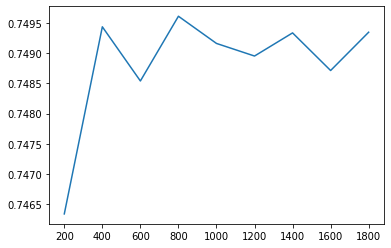

In [10]:
ks = pd.Series(range(200,2000, 200))
ks.index = range(200,2000, 200)
test_errs = ks.apply(get_cv_error_random_forest_estimators)

test_errs.plot.line()
test_errs.sort_values()

In [15]:
def get_cv_error_random_forest_depth(k):
  # define pipeline
  pipeline = make_pipeline(
      RandomForestClassifier(max_depth=k)
  )
  # calculate errors from cBhaluezpz123@ross-validation
  cv_errs = cross_val_score(pipeline, X=X_train, 
                             y=y_train,
                             scoring='f1_macro', cv=10)
  # calculate average of the cross-validation errors
  return cv_errs.mean()

60    0.745682
50    0.748016
70    0.748727
30    0.749235
80    0.749658
90    0.749718
20    0.750637
40    0.752395
10    0.755751
dtype: float64

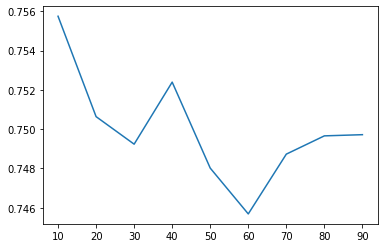

In [16]:
ks = pd.Series(range(10,100, 10))
ks.index = range(10,100, 10)
test_errs = ks.apply(get_cv_error_random_forest_depth)

test_errs.plot.line()
test_errs.sort_values()

In [17]:
classifier = RandomForestClassifier(max_depth=10, n_estimators=800)
classifier.fit(X_train, y_train)


y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.50      0.64      0.56       265
           2       0.49      0.35      0.41       265
           3       1.00      1.00      1.00       269
           4       1.00      1.00      1.00       251

    accuracy                           0.75      1050
   macro avg       0.75      0.75      0.74      1050
weighted avg       0.75      0.75      0.74      1050

